# Transportation Problem
"""
The West Hartford Senior Center is trying to establish a transportation system of small and large vans.  
It can spend no more than \\$100,000 for both sizes of vehicles and no more than \\$500 per month for maintenance.
The WHSC can purchase a small van, which carries up to 7 passengers, for \\$10,000 and maintain it for $100
per month.  the large vans, which carry up to 15 passengers, cost \\$20,000 each and can be maintained for 
\\$75 per month.  How many of each type of van should they purchase if they want to maximize the number of 
passengers?

    s = # of small vans
    l = # of large vans

    Maximize # of passengers
    P = 7s + 15l
    
    Constraints
    s >= 0
    l >= 0
    10,000s + 20,000l <= 100,000  # Initial Purchase Cost
    100s + 75l <= 500             # Monthly Maintenance Cost
"""    
    

In [1]:
# Define the Problem and Variables
import numpy as np
import pulp
%matplotlib inline
import matplotlib.pyplot as plt

transportation_problem = pulp.LpProblem("Transportation Problem", pulp.LpMaximize)

s = pulp.LpVariable('s', lowBound=0, cat='Integer')
l = pulp.LpVariable('l', lowBound=0, cat='Integer')

In [2]:
# Objective Function
transportation_problem += 7*s + 15*l, "P"

# Constraints
transportation_problem += 10000*s + 20000*l <= 100000
transportation_problem += 100*s + 75*l <= 500

In [3]:
print(transportation_problem)

Transportation Problem:
MAXIMIZE
15*l + 7*s + 0
SUBJECT TO
_C1: 20000 l + 10000 s <= 100000

_C2: 75 l + 100 s <= 500

VARIABLES
0 <= l Integer
0 <= s Integer



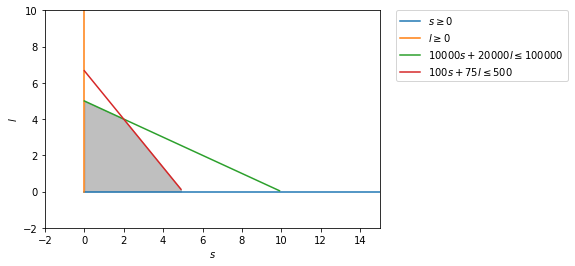

In [4]:
# Construct lines
# s >= 0
x = np.linspace(0, 100, 1000)
ss = x*0
# l >= 0
ll = x*0
# 20000*y1 + 10000*s <= 100000
y1 = (-10000/20000)*x + 100000/20000
# 100*s + 75*l <= 500 
y2 = (-100/75)*x + 500/75

# Make plot
plt.plot(x, ss, label=r'$s\geq0$')
plt.plot(ll, x, label=r'$l\geq0$')
plt.plot(x[0:100], y1[0:100], label=r'$10000s + 20000l \leq 100000$')
plt.plot(x[0:50], y2[0:50], label=r'$100s + 75l \leq 500$')
plt.xlim((-2, 15))
plt.ylim((-2, 10))
plt.xlabel(r'$s$')
plt.ylabel(r'$l$')

# Fill feasible region
y3 = np.minimum(y1, y2)
y4 = np.minimum(ss, ll)
plt.fill_between(x, y4, y3, where=y3>y4, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [5]:
transportation_problem.solve()
print(pulp.LpStatus[transportation_problem.status])

Optimal


In [6]:
for var in transportation_problem.variables():
    print(var.name + " = " + str(var.varValue))

l = 5.0
s = 0.0


In [7]:
print(pulp.value(transportation_problem.objective))

75.0
